In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import statsmodels.formula.api as smf

In [2]:
df = (
    pd.read_csv("data.csv")
    .rename(columns={
        "Creature": "animal",
        "Mass (grams)": "mass",
        "Resting Heart Rate (BPM)": "bpm",
        "Longevity (Years)": "longevity",
    })
    .set_index("animal")
)
df

mass  bpm  longevity
animal                                
Human            90000   60         70
Cat               2000  150         15
Small dog         2000  100         10
Medium dog        5000   90         15
Large dog         8000   75         17
Hamster             60  450          3
Chicken           1500  275         15
Monkey            5000  190         15
Horse          1200000   44         40
Cow             800000   65         22
Pig             150000   70         25
Rabbit            1000  205          9
Elephant       5000000   30         70
Giraffe         900000   65         20
Large whale  120000000   20         80

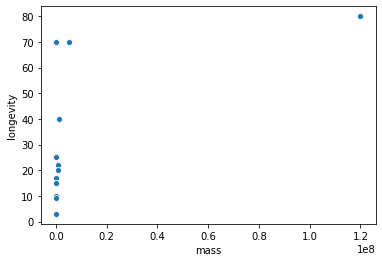

In [3]:
seaborn.scatterplot(data=df, x="mass", y="longevity")

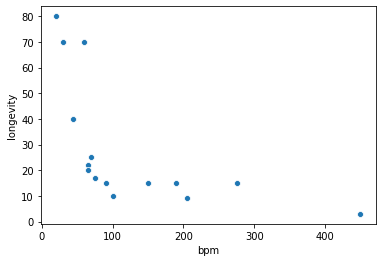

In [4]:
seaborn.scatterplot(data=df, x="bpm", y="longevity")

In [5]:
df["log_mass"] = np.log10(df["mass"])
df["log_bpm"] = np.log10(df["bpm"])
df["log_longevity"] = np.log10(df["longevity"])

In [6]:
seaborn.scatterplot(data=df, x="log_mass", y="longevity")

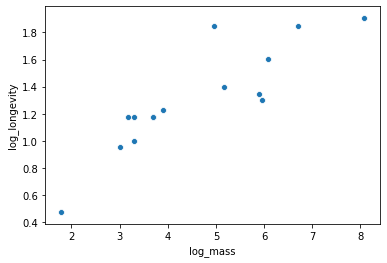

In [7]:
seaborn.scatterplot(data=df, x="log_mass", y="log_longevity")

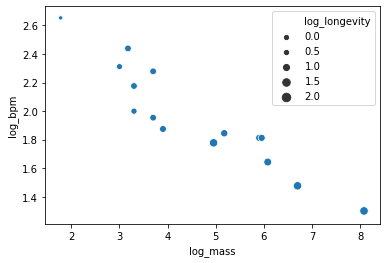

In [8]:
seaborn.scatterplot(data=df, x="log_mass", y="log_bpm", size="log_longevity")

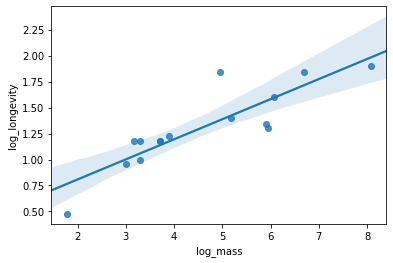

In [9]:
seaborn.regplot(data=df, y="log_longevity", x="log_mass")

In [10]:
seaborn.residplot(data=df, y="log_longevity", x="log_mass")

In [11]:
seaborn.regplot(data=df, y="log_longevity", x="log_bpm")

In [12]:
seaborn.regplot(data=df, y="log_bpm", x="log_mass")

In [13]:
seaborn.regplot(data=df, y="log_longevity", x="log_mass", order=2)

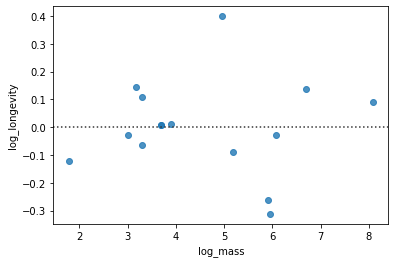

In [14]:
seaborn.residplot(data=df, y="log_longevity", x="log_mass", order=2)

In [15]:
check_results = smf.ols('log_longevity ~ log_mass', data=df).fit()
check_results.summary()

/home/rjmorris/apps/opt/pyenv/versions/3.7.3/envs/animals/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_longevity   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     40.29
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           2.55e-05
Time:                        16:18:50   Log-Likelihood:                 4.3602
No. Observations:                  15   AIC:                            -4.720
Df Residuals:                      13   BIC:                            -3.304
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4214      0.148      2.842      0.014       0.101       0.742
log_mass       0.1933      0.030      6.347      0.000       0.128       0.259
==============================================================================
Omnibus:                        3.666   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                1.380
Skew:                           0.591   Prob(JB):                        0.502
Kurtosis:                       3.901   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
check_results = smf.ols('log_longevity ~ log_mass + np.power(log_mass, 2)', data=df).fit()
check_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_longevity   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     23.03
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           7.80e-05
Time:                        16:18:50   Log-Likelihood:                 5.6027
No. Observations:                  15   AIC:                            -5.205
Df Residuals:                      12   BIC:                            -3.081
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0827      0.371     -0.223      0.827      -0.891       0.726
log_mass                  0.4263      0.161      2.646      0.021       0.075       0.777
np.power(log_mass, 2)    -0.0238      0.016     -1.470      0.167      -0.059       0.011
==============================================================================
Omnibus:                        1.857   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                0.393
Skew:                           0.285   Prob(JB):                        0.821
Kurtosis:                       3.552   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
check_results = smf.ols('log_longevity ~ log_bpm', data=df).fit()
check_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_longevity   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     44.28
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.58e-05
Time:                        16:18:50   Log-Likelihood:                 4.9022
No. Observations:                  15   AIC:                            -5.804
Df Residuals:                      13   BIC:                            -4.388
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1028      0.274     11.316      0.000       2.510       3.695
log_bpm       -0.9175      0.138     -6.654      0.000      -1.215      -0.620
==============================================================================
Omnibus:                        1.798   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.143
Skew:                           0.660   Prob(JB):                        0.565
Kurtosis:                       2.701   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results = smf.ols('log_longevity ~ log_mass + log_bpm', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_longevity   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     23.06
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           7.74e-05
Time:                        16:18:50   Log-Likelihood:                 5.6130
No. Observations:                  15   AIC:                            -5.226
Df Residuals:                      12   BIC:                            -3.102
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9791      1.064      1.860      0.088      -0.340       4.298
log_mass       0.0857      0.078      1.092      0.296      -0.085       0.257
log_bpm       -0.5441      0.368     -1.477      0.165      -1.347       0.259
==============================================================================
Omnibus:                        3.769   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                1.946
Skew:                           0.873   Prob(JB):                        0.378
Kurtosis:                       3.259   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
out = pd.DataFrame({
    "log_observed": df["log_longevity"],
    "log_predicted": results.predict(),
}).reset_index()
out["observed"] = np.power(10, out["log_observed"])
out["predicted"] = np.power(10, out["log_predicted"])
out["ratio"] = out["observed"] / out["predicted"]
out["pctdiff"] = 100 * (out["observed"] - out["predicted"]) / out["predicted"]
out["overunder"] = out["ratio"].map(lambda x: "More than predicted" if x >= 1 else "Less than predicted")
out = out.sort_values(by="ratio", ascending=False)
out["animal"] = pd.Categorical(out["animal"], categories=out["animal"])
out

animal  log_observed  log_predicted  observed  predicted     ratio  \
0         Human      1.845098       1.436378      70.0  27.313527  2.562833   
6       Chicken      1.176091       0.924251      15.0   8.399444  1.785833   
7        Monkey      1.176091       1.056431      15.0  11.387577  1.317225   
1           Cat      1.176091       1.078176      15.0  11.972257  1.252897   
12     Elephant      1.845098       1.749700      70.0  56.195257  1.245657   
8         Horse      1.602060       1.606083      40.0  40.372239  0.990780   
10          Pig      1.397940       1.418971      25.0  26.240418  0.952729   
11       Rabbit      0.954243       0.978566       9.0   9.518455  0.945532   
3    Medium dog      1.176091       1.232982      15.0  17.099432  0.877222   
14  Large whale      1.903090       1.963805      80.0  92.003570  0.869531   
4     Large dog      1.230449       1.293556      17.0  19.658757  0.864755   
9           Cow      1.342423       1.498794      22.0  31.535109  0.697635   
2     Small dog      1.000000       1.173979      10.0  14.927206  0.669918   
13      Giraffe      1.301030       1.503179      20.0  31.855086  0.627843   
5       Hamster      0.477121       0.688067       3.0   4.876038  0.615254   

       pctdiff            overunder  
0   156.283274  More than predicted  
6    78.583252  More than predicted  
7    31.722493  More than predicted  
1    25.289660  More than predicted  
12   24.565674  More than predicted  
8    -0.922017  Less than predicted  
10   -4.727129  Less than predicted  
11   -5.446840  Less than predicted  
3   -12.277786  Less than predicted  
14  -13.046852  Less than predicted  
4   -13.524544  Less than predicted  
9   -30.236486  Less than predicted  
2   -33.008227  Less than predicted  
13  -37.215678  Less than predicted  
5   -38.474633  Less than predicted

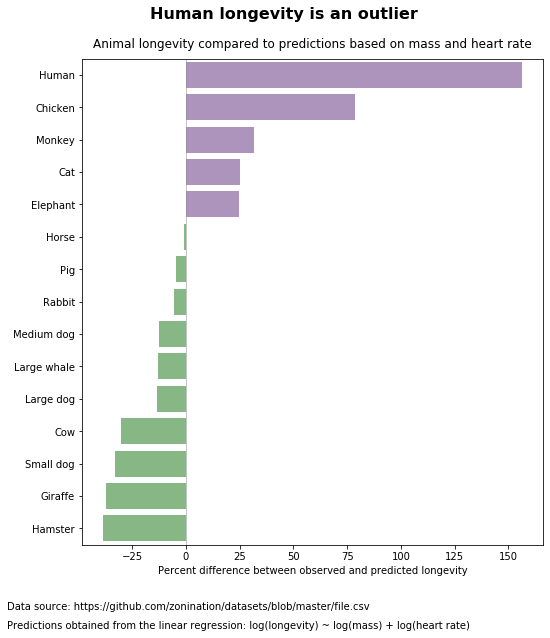

In [20]:
fig = plt.figure(figsize=(8,9))
ax = fig.add_axes((0.15, 0.15, 0.8, 0.75))
fig.suptitle("Human longevity is an outlier", fontsize=16, fontweight="bold")
seaborn.barplot(
    ax=ax,
    data=out,
    x="pctdiff",
    y="animal",
    hue="overunder",
    palette=["#af8dc3", "#7fbf7b"],
    dodge=False,
)
ax.axvline(0, color="#888888", alpha=1, linestyle="-", linewidth=0.5)
ax.set_xlabel("Percent difference between observed and predicted longevity")
ax.set_ylabel(None)
ax.set_title("Animal longevity compared to predictions based on mass and heart rate")
ax.title.set(y=1.01)
ax.legend().remove()
plt.figtext(0.02, 0.05, "Data source: https://github.com/zonination/datasets/blob/master/file.csv", horizontalalignment="left")
plt.figtext(0.02, 0.02, "Predictions obtained from the linear regression: log(longevity) ~ log(mass) + log(heart rate)", horizontalalignment="left")
plt.savefig("predicted_longevity.png")
plt.show()

In [21]:
hamster = df[["longevity", "mass", "bpm"]].copy()
hamster["mass_vs_hamster"] = 100 * hamster["mass"] / hamster.at["Hamster", "mass"]
hamster["bpm_vs_hamster"] = 100 * hamster["bpm"] / hamster.at["Hamster", "bpm"]
hamster["longevity_vs_hamster"] = 100 * hamster["longevity"] / hamster.at["Hamster", "longevity"]
hamster = hamster.drop(index="Hamster")
hamster

longevity       mass  bpm  mass_vs_hamster  bpm_vs_hamster  \
animal                                                                    
Human               70      90000   60     1.500000e+05       13.333333   
Cat                 15       2000  150     3.333333e+03       33.333333   
Small dog           10       2000  100     3.333333e+03       22.222222   
Medium dog          15       5000   90     8.333333e+03       20.000000   
Large dog           17       8000   75     1.333333e+04       16.666667   
Chicken             15       1500  275     2.500000e+03       61.111111   
Monkey              15       5000  190     8.333333e+03       42.222222   
Horse               40    1200000   44     2.000000e+06        9.777778   
Cow                 22     800000   65     1.333333e+06       14.444444   
Pig                 25     150000   70     2.500000e+05       15.555556   
Rabbit               9       1000  205     1.666667e+03       45.555556   
Elephant            70    5000000   30     8.333333e+06        6.666667   
Giraffe             20     900000   65     1.500000e+06       14.444444   
Large whale         80  120000000   20     2.000000e+08        4.444444   

             longevity_vs_hamster  
animal                             
Human                 2333.333333  
Cat                    500.000000  
Small dog              333.333333  
Medium dog             500.000000  
Large dog              566.666667  
Chicken                500.000000  
Monkey                 500.000000  
Horse                 1333.333333  
Cow                    733.333333  
Pig                    833.333333  
Rabbit                 300.000000  
Elephant              2333.333333  
Giraffe                666.666667  
Large whale           2666.666667

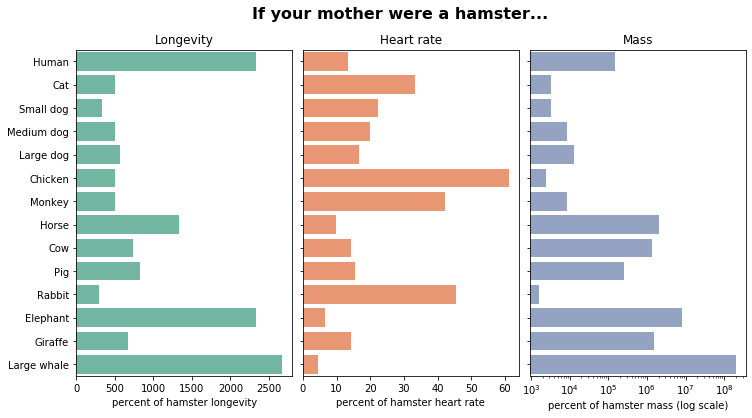

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
fig.subplots_adjust(wspace=0.05)
fig.suptitle("If your mother were a hamster...", fontsize=16, fontweight="bold")
subax = seaborn.barplot(ax=ax[0], x=hamster["longevity_vs_hamster"], y=hamster.index, palette=["#66c2a5"])
subax.set_title("Longevity")
subax.set_xlabel("percent of hamster longevity")
subax.set_ylabel(None)
subax = seaborn.barplot(ax=ax[1], x=hamster["bpm_vs_hamster"], y=hamster.index, palette=["#fc8d62"])
subax.set_title("Heart rate")
subax.set_xlabel("percent of hamster heart rate")
subax.set_ylabel(None)
subax.set_yticklabels([])
subax = seaborn.barplot(ax=ax[2], x=hamster["mass_vs_hamster"], y=hamster.index, palette=["#8da0cb"])
subax.set_title("Mass")
subax.set_xlabel("percent of hamster mass (log scale)")
subax.set_xscale("log")
subax.set_ylabel(None)
subax.set_yticklabels([])
plt.savefig("vs_hamster.png")
plt.show()